# Explore here

In [2]:
import os
import psycopg2
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# 1) Connect to the database here using the SQLAlchemy's create_engine function
#con_str = "postgresql://gitpod:postgres:@localhost/milser_pg"
global engine # This allows us to use a global variable called engine
# A "connection string" is basically a string containing all database credentials together.
#connection_string = f"dbname={os.getenv('DB_NAME')} user={os.getenv('DB_USER')} password={os.getenv('DB_PASSWORD')} host={os.getenv('DB_HOST')}"

#engine = create_engine(connection_string)
#Session = sessionmaker(bind=engine,autocommit=False) 

# Ruta del directorio del script
#script_dir = os.path.dirname(__file__)  # Obtiene la ruta del directorio actual del script
cwd = '%pwd'
script_dir = os.path.abspath(cwd)
# Construir la ruta al archivo CSV
relative_path = os.path.join("data", "raw", "AB_NYC_2019.csv")
absolute_path = os.path.abspath(os.path.join(script_dir, relative_path))
#path=("../../Proyecto-de-Preprocesamiento-de-Datos/data/raw/AB_NYC_2019")

# Leer el archivo CSV
total_data = pd.read_csv(r"C:\Users\milser\Documents\Trasteo_4geeks\Proyecto-de-Preprocesamiento-de-Datos\data\raw\AB_NYC_2019.csv")
total_data.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
total_data.shape

(48895, 16)

El dataset tiene 48895 instanias con 16 variables, de estas vamosa a centrarnos en calculated_host_listings_count que utilizaremos para determinar el exito que ha tenido un apartamento.

#### Limpieza de datos

In [4]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
total_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Como podemos ver last_review y reviews_per_month contienen un exceso de datos nulos, por lo que las eliminaremos del dataset de analisis.
Las variables name y host_name contienen nulos, pero seran eliminadas por carecer de valor para el analisis, no por el hecho de que contengan valores nulos.

In [6]:
total_data.drop("host_id", axis = 1).duplicated().sum()
total_data.drop(["latitude","longitude","id","reviews_per_month", "last_review", "name", "host_name"], axis = 1, inplace = True)

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]
total_data.head(10)




,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365,0,1,2
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194,1,0,3
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0,1,1,4
5,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129,1,1,5
6,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0,0,0,6
7,8967,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220,0,1,7
8,7490,Manhattan,Upper West Side,Private room,79,2,118,1,0,0,1,8
9,7549,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188,1,1,9


In [8]:
total_data.head(10)

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365,0,1,2
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194,1,0,3
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0,1,1,4
5,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129,1,1,5
6,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,1,0,0,0,6
7,8967,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220,0,1,7
8,7490,Manhattan,Upper West Side,Private room,79,2,118,1,0,0,1,8
9,7549,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188,1,1,9


In [9]:
total_data.drop_duplicates(["room_type", "room_type_n"])[["room_type", "room_type_n"]].to_excel(r"C:\Users\milser\Documents\Trasteo_4geeks\Proyecto-de-Preprocesamiento-de-Datos\data\raw\room_type.xlsx", index = False)
total_data.drop_duplicates(["neighbourhood_group", "neighbourhood_group_n"])[["neighbourhood_group", "neighbourhood_group_n"]].to_excel(r"C:\Users\milser\Documents\Trasteo_4geeks\Proyecto-de-Preprocesamiento-de-Datos\data\raw\neighbourhood_group.xlsx", index = False)
total_data.drop_duplicates(["neighbourhood", "neighbourhood_n"])[["neighbourhood", "neighbourhood_n"]].to_excel(r"C:\Users\milser\Documents\Trasteo_4geeks\Proyecto-de-Preprocesamiento-de-Datos\data\raw\neighbourhood.xlsx", index = False)

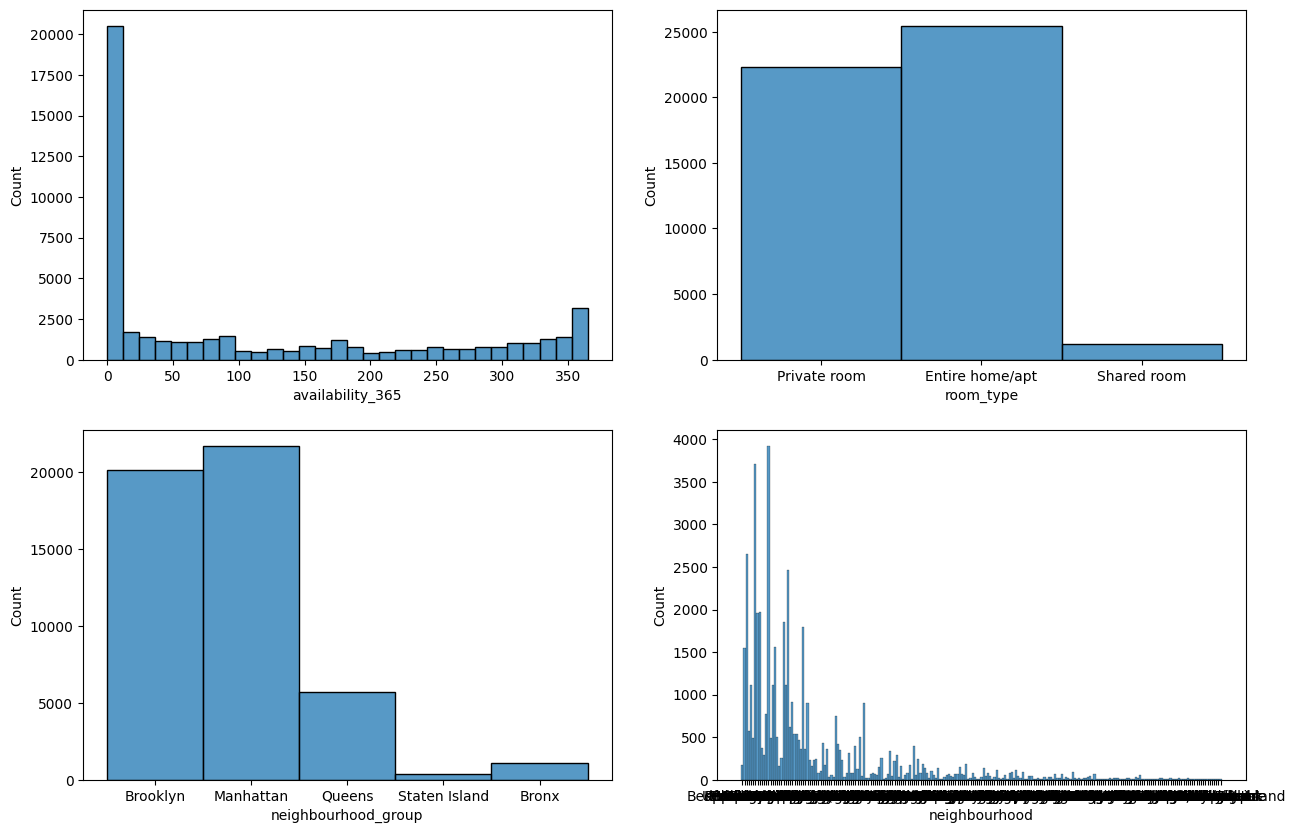

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,2, figsize = (15, 10))

sns.histplot(total_data, x = "availability_365", ax = axis[0,0])
sns.histplot(total_data, x = "room_type", ax = axis[0,1])
sns.histplot(total_data, x = "neighbourhood_group", ax = axis[1,0])
sns.histplot(total_data, x = "neighbourhood", ax = axis[1,1])

plt.show()

##### Graficos categoricos

Aqui podemos ver como 


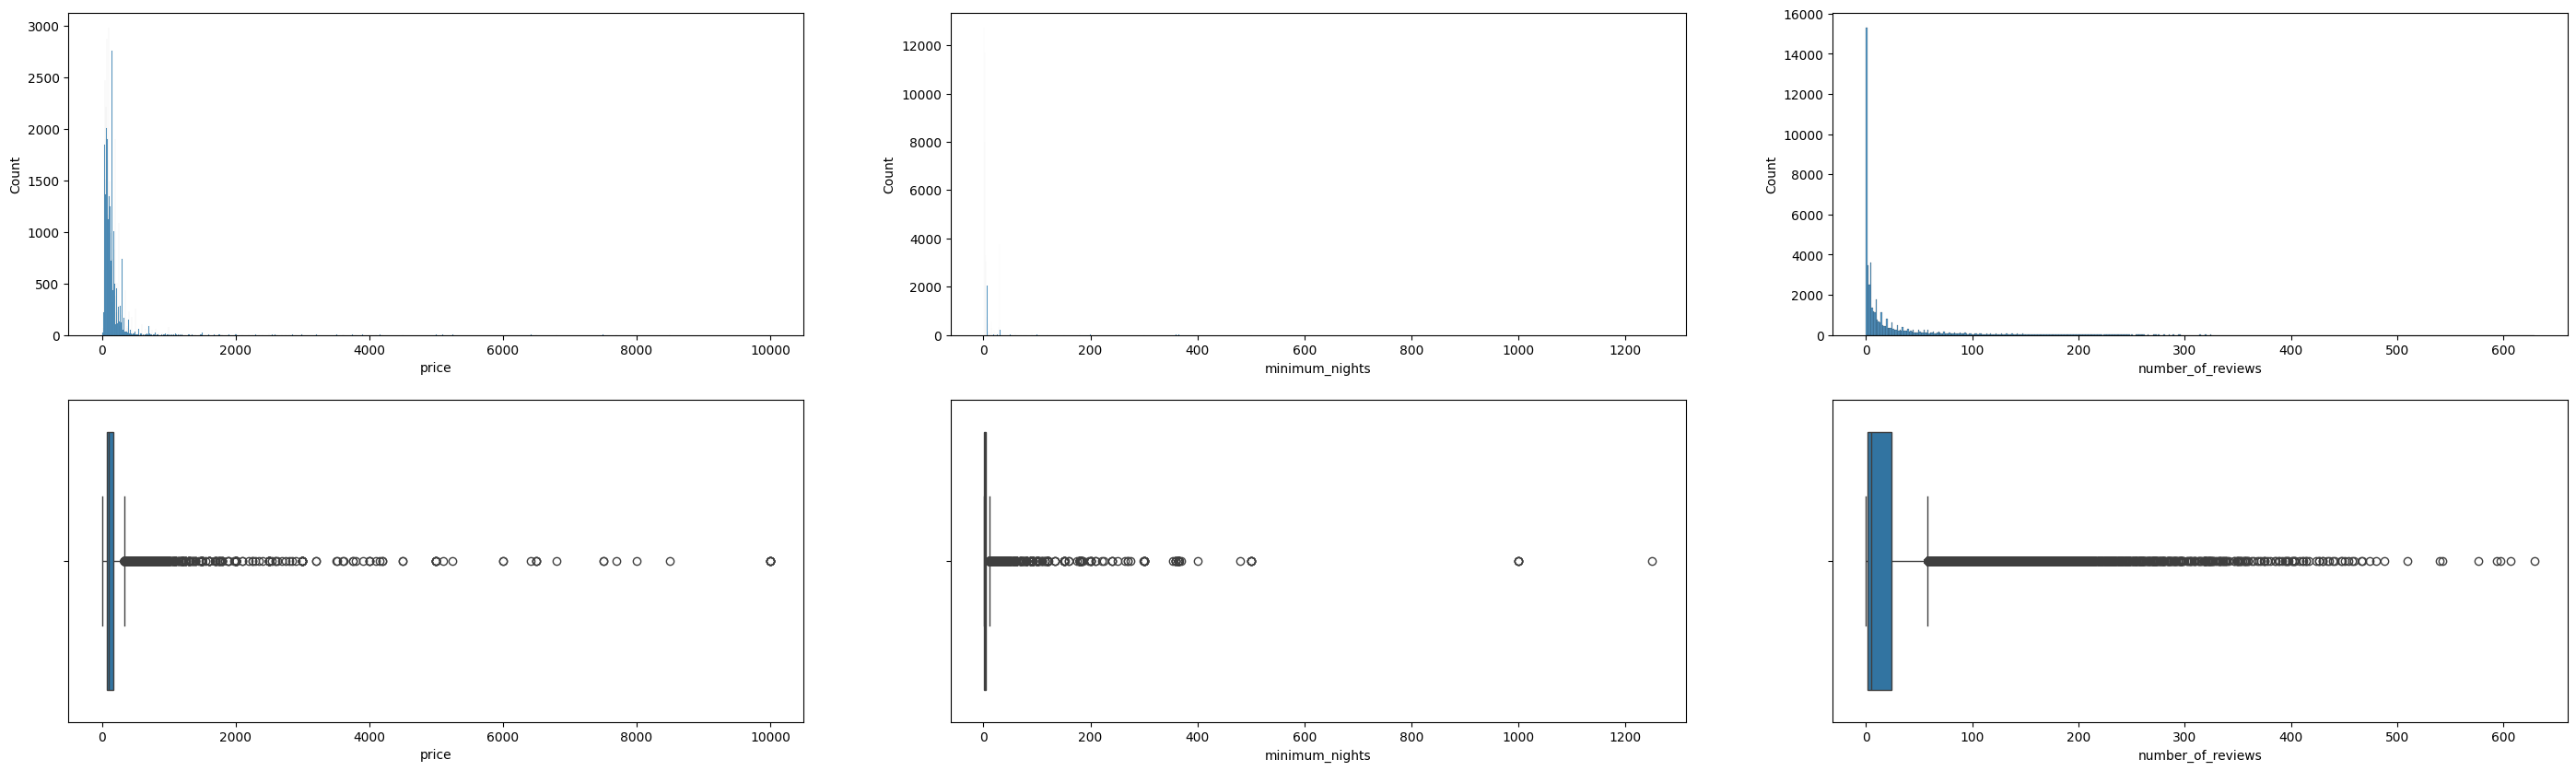

In [12]:
fig, axis = plt.subplots(2, 3, figsize = (35, 10))

sns.histplot(total_data, x = "price", ax = axis[0, 0])
sns.boxplot(total_data, x = "price", ax = axis[1, 0])

sns.histplot(total_data, x = "minimum_nights", ax = axis[0, 1])
sns.boxplot(total_data, x = "minimum_nights", ax = axis[1, 1])

sns.histplot(total_data, x = "number_of_reviews", ax = axis[0, 2])
sns.boxplot(total_data, x = "number_of_reviews", ax = axis[1, 2])




plt.show()

<Axes: xlabel='calculated_host_listings_count'>

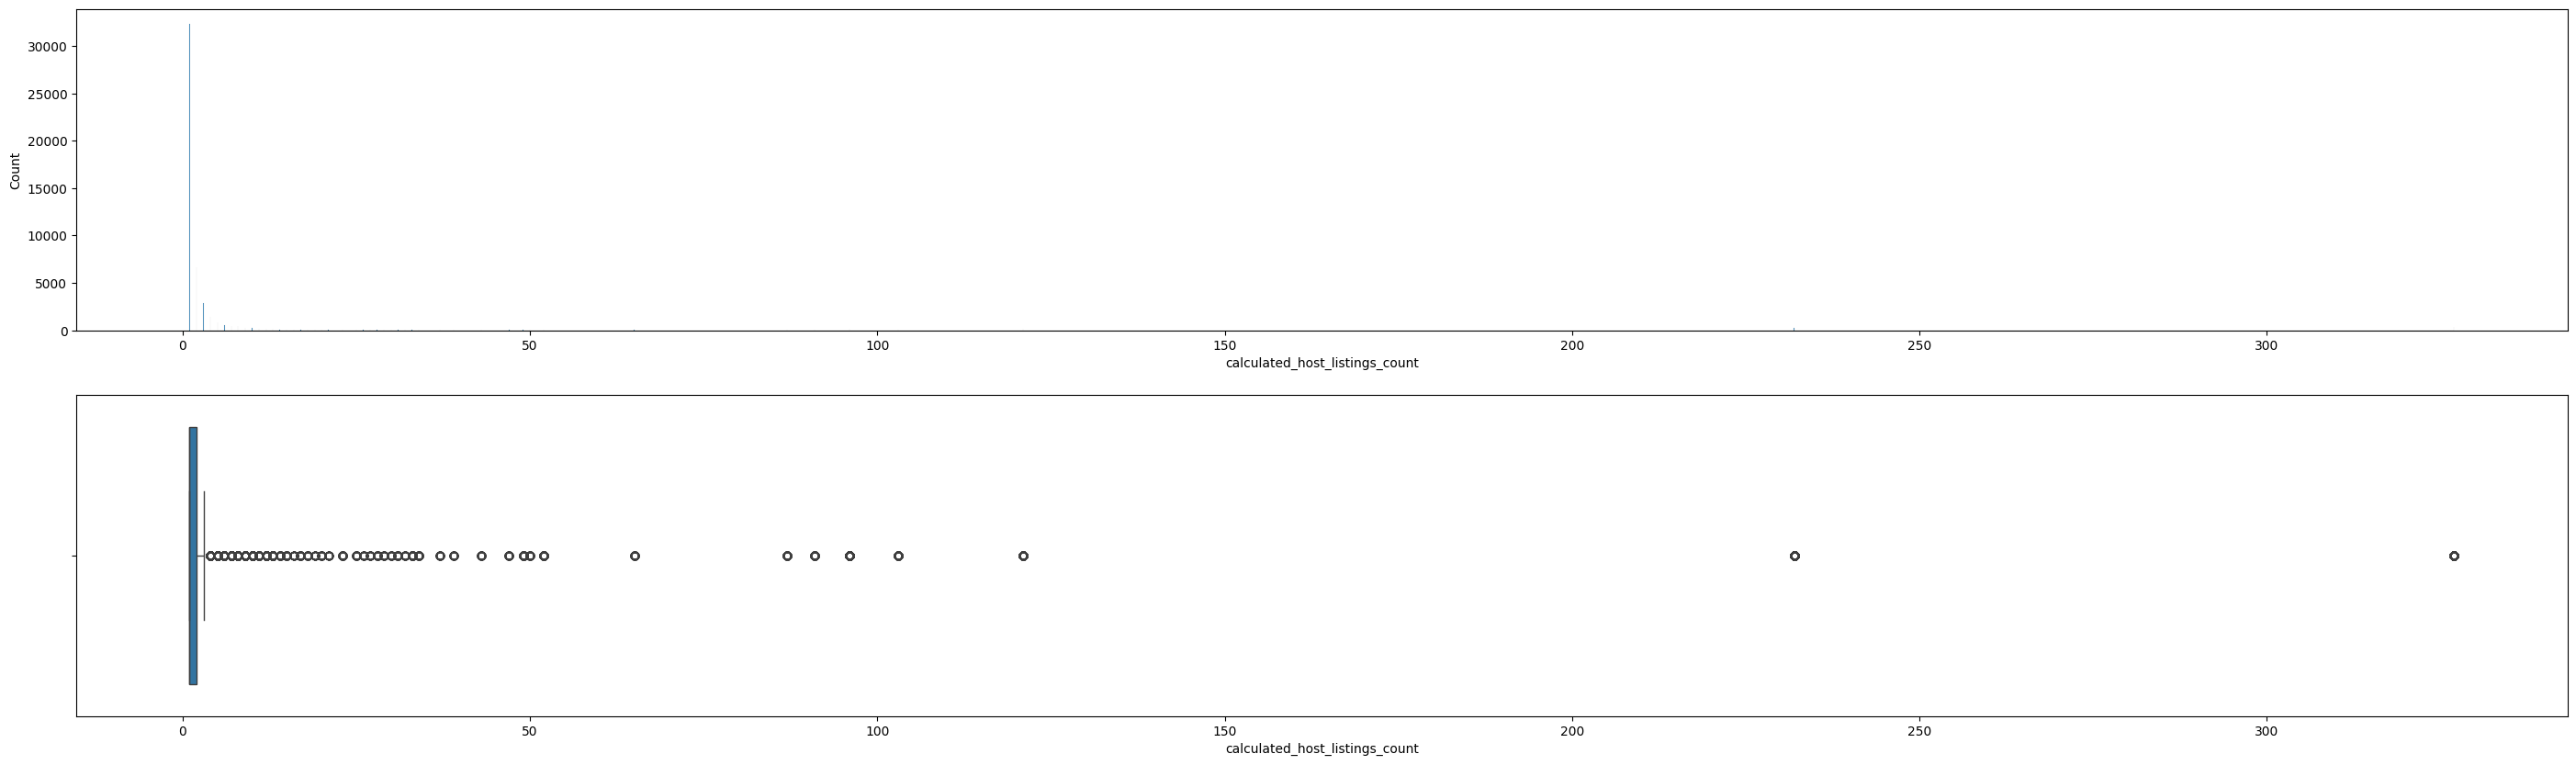

In [15]:
fig, axis = plt.subplots(2, 1, figsize = (35, 10))

sns.histplot(total_data, x = "calculated_host_listings_count", ax = axis[0])
sns.boxplot(total_data, x = "calculated_host_listings_count", ax = axis[1])

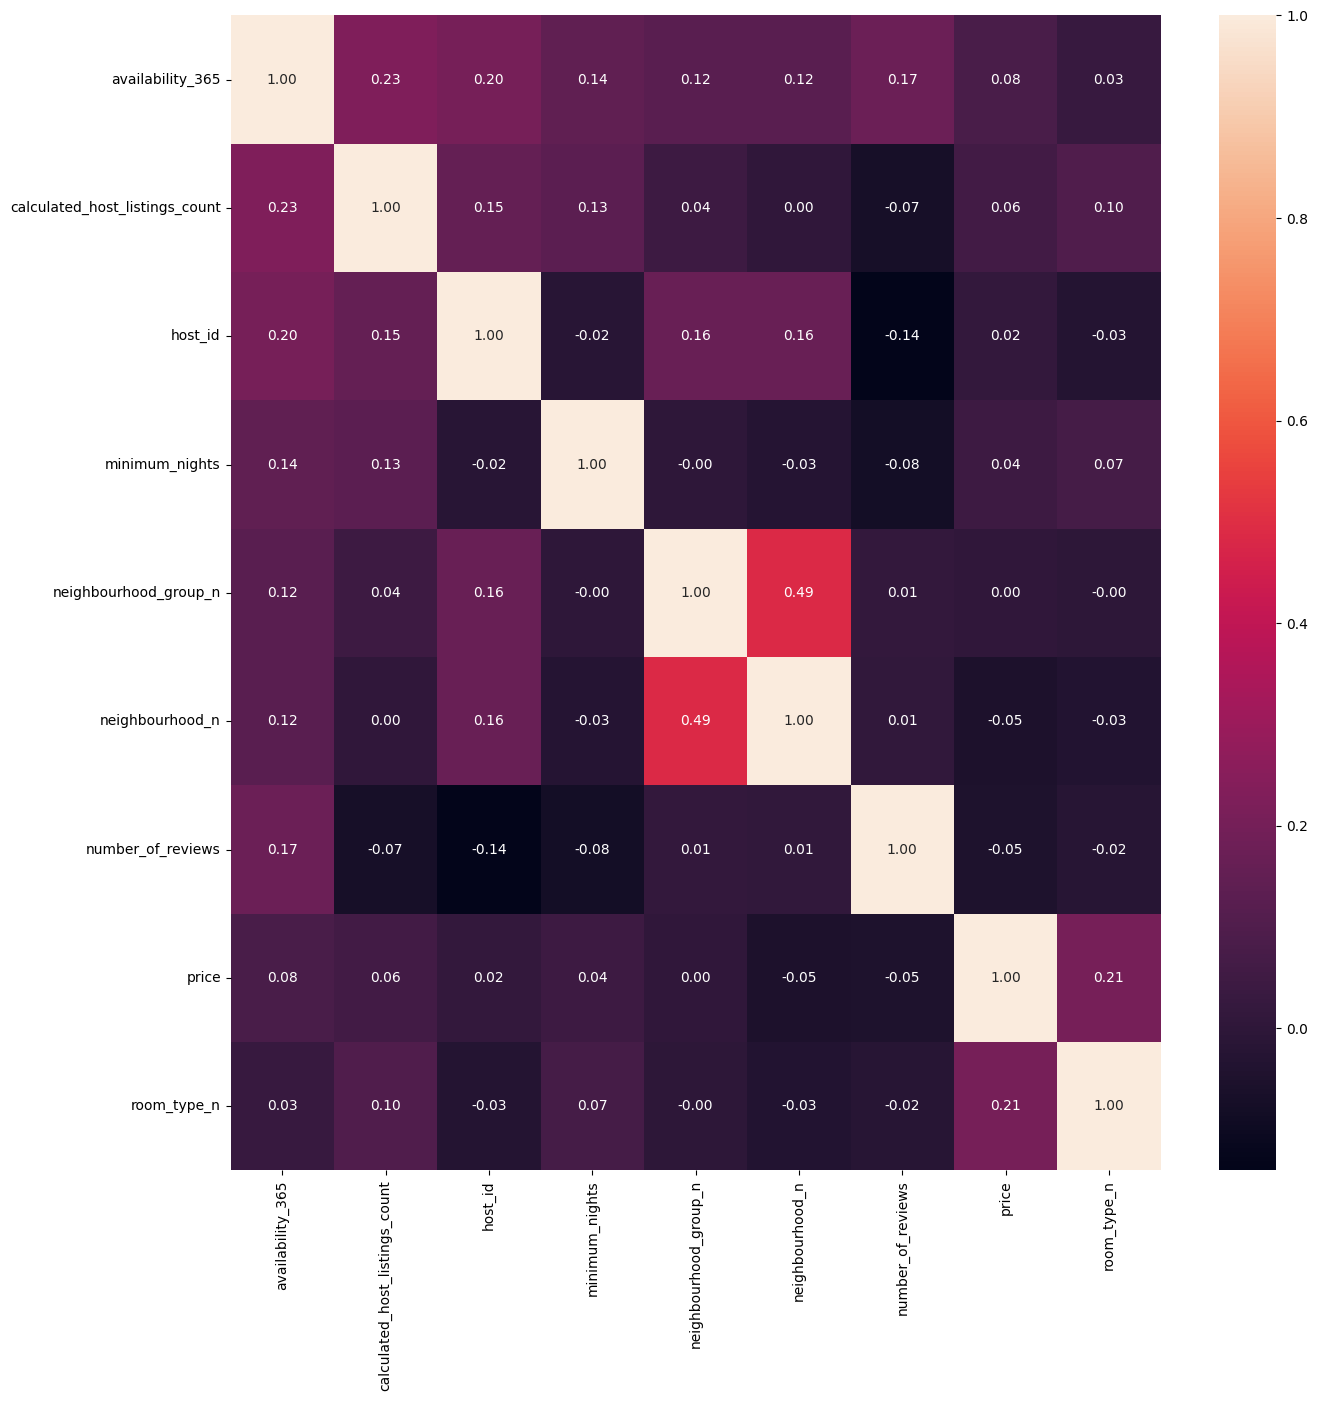

In [56]:
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(total_data[total_data.columns.difference(["room_type", "neighbourhood_group", "neighbourhood"])].corr(), annot = True, fmt = ".2f")

plt.show()

### DAY 2
#### Outlayers
##### Reemplazar





In [21]:
descr_price = total_data.price.describe()
descr_price

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [23]:
price_iqr = descr_price["75%"]-descr_price["25%"]
uper_l = descr_price["75%"]
lower_l = descr_price["25%"]


106.0

##### Mantener

In [18]:
total_data.isnull().sum()
total_data = total_data()



host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
neighbourhood_n                   0
dtype: int64